<a href="https://colab.research.google.com/github/luthfialghz/Capstone-Project---DewPet-Bangkit-2022/blob/machine_learning/disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
dataframe = pd.read_csv('project_dataset.csv')
dataframe.head()

,Abdominal Pain,Abnormal Elevation of Inner Eyelid,Abnormal Coloration of One or More Teeth,Abnormal Posture,Abnormal Nail Color,Bad Odor,Bad Breath,Bleeding,Bleeding Gums,Blood in Urine/Feses,...,Squinting,Seizures,Unwillingness to Move,Vomiting,Vision Loss/Blindness,Weight Loss,Whitish-appearing Pupil,Yeasty Smell,Animal Type,Diagnosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas


In [3]:
traintest = dataframe.copy()
#traintest.drop(['Animal Type'], axis=1, inplace=True)
traintest.head()

,Abdominal Pain,Abnormal Elevation of Inner Eyelid,Abnormal Coloration of One or More Teeth,Abnormal Posture,Abnormal Nail Color,Bad Odor,Bad Breath,Bleeding,Bleeding Gums,Blood in Urine/Feses,...,Squinting,Seizures,Unwillingness to Move,Vomiting,Vision Loss/Blindness,Weight Loss,Whitish-appearing Pupil,Yeasty Smell,Animal Type,Diagnosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas


In [4]:
label_encoder = LabelEncoder()
traintest.loc[:,"Animal Type"] = label_encoder.fit_transform(traintest.iloc[:,-2])

In [5]:
X = traintest.drop(['Diagnosis'], axis=1)
Y = traintest['Diagnosis']
X.head()

,Abdominal Pain,Abnormal Elevation of Inner Eyelid,Abnormal Coloration of One or More Teeth,Abnormal Posture,Abnormal Nail Color,Bad Odor,Bad Breath,Bleeding,Bleeding Gums,Blood in Urine/Feses,...,Swelling,Squinting,Seizures,Unwillingness to Move,Vomiting,Vision Loss/Blindness,Weight Loss,Whitish-appearing Pupil,Yeasty Smell,Animal Type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X_train = X.iloc[:-56,:]
X_test = X.iloc[-56:,:]

Y_train = Y.iloc[:-56]
Y_test = Y.iloc[-56:]

In [ ]:
X_train.shape

(345, 92)

In [7]:
Y_train.nunique()

52

In [8]:
Y_test.nunique()

52

In [9]:
Y_train_encode = pd.get_dummies(Y_train)
Y_train_encode.shape

(348, 52)

In [10]:
Y_test_encode = pd.get_dummies(Y_test)

In [23]:
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(64, activation='relu', input_dim=x_train.shape[1]),
    tf.keras.layers.Dense(128, activation='relu', input_shape = (X_train.shape[1], )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(Y_train_encode.shape[1], activation='softmax')
])


In [24]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

In [25]:
# train model
history = model.fit(X_train, Y_train_encode, epochs=25, validation_split=0.2)

Epoch 1/25
9/9 [==============================] - 1s 27ms/step - loss: 3.8942 - accuracy: 0.0971 - val_loss: 3.8311 - val_accuracy: 0.1857
Epoch 2/25
9/9 [==============================] - 0s 5ms/step - loss: 3.7404 - accuracy: 0.3022 - val_loss: 3.6898 - val_accuracy: 0.1857
Epoch 3/25
9/9 [==============================] - 0s 7ms/step - loss: 3.5239 - accuracy: 0.3381 - val_loss: 3.4833 - val_accuracy: 0.2000
Epoch 4/25
9/9 [==============================] - 0s 5ms/step - loss: 3.2200 - accuracy: 0.3273 - val_loss: 3.2374 - val_accuracy: 0.2286
Epoch 5/25
9/9 [==============================] - 0s 7ms/step - loss: 2.8807 - accuracy: 0.3094 - val_loss: 3.0236 - val_accuracy: 0.2429
Epoch 6/25
9/9 [==============================] - 0s 7ms/step - loss: 2.5616 - accuracy: 0.3993 - val_loss: 2.7592 - val_accuracy: 0.3143
Epoch 7/25
9/9 [==============================] - 0s 5ms/step - loss: 2.2675 - accuracy: 0.4496 - val_loss: 2.4563 - val_accuracy: 0.3429
Epoch 8/25
9/9 [=================

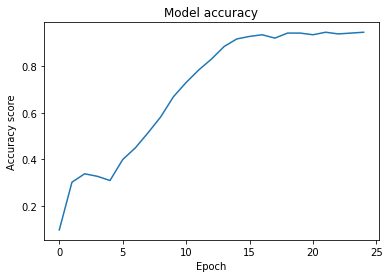

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

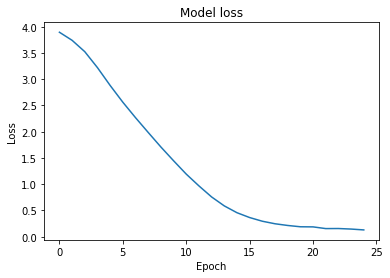

In [27]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

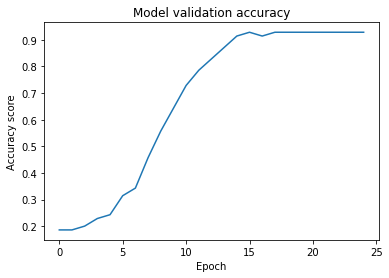

In [28]:
plt.plot(history.history["val_accuracy"])
plt.title("Model validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

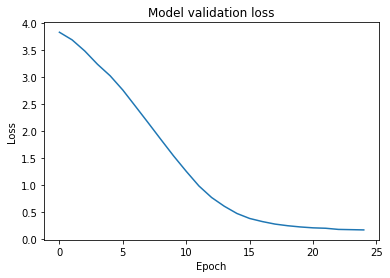

In [29]:
plt.plot(history.history["val_loss"])
plt.title("Model validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [30]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [31]:
model.evaluate(X_test, Y_test_encode)

2/2 [==============================] - 0s 5ms/step - loss: 0.1772 - accuracy: 0.9286


[0.17721818387508392, 0.9285714030265808]

In [ ]:
predict = model.predict(X_test)